In [2]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [3]:
# 创建大小为5的单位矩阵
def warmUpExercise():
    return(np.identity(5))

In [4]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [17]:
data = np.loadtxt('linear_regression_data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

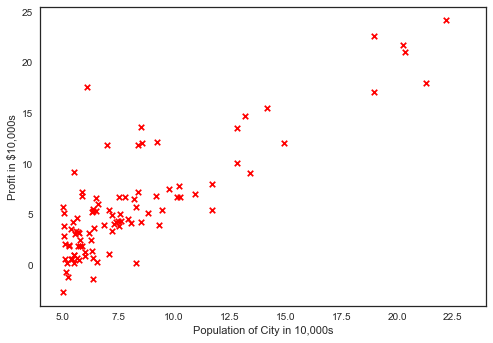

In [22]:
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

In [35]:
theta=[[0],[0]]
h = X.dot(theta)
l = len(theta)
print l

2


In [59]:
# 计算损失函数
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1.0/(2*m)*(np.sum(np.square(h-y)))
    
    return J

In [60]:
computeCost(X,y)

32.072733877455676

In [63]:
num_iters = 1500
J_history = np.zeros(num_iters)
print(J_history)

[ 0.  0.  0. ...,  0.  0.  0.]


In [78]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=2000):
    m = y.size
    J_history = np.zeros(num_iters)
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha * (1.0/m) * X.T.dot(h-y)
        J_history[iter] = computeCost(X,y,theta)
    return (theta, J_history)

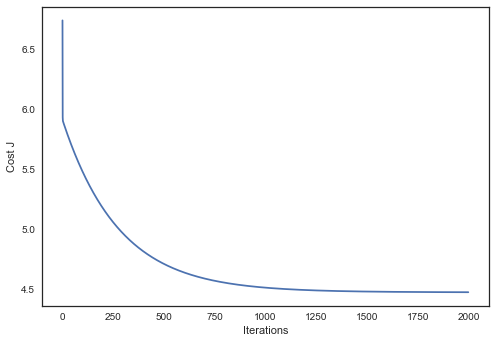

In [80]:
# 画出每一次迭代和损失函数变化
theta , Cost_J = gradientDescent(X, y)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
plt.plot(Cost_J)